In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from tqdm import tqdm

17996
-0.04317626139142031 22.016008033415563
0.95 -0.4 24.769890996934162 26.036000716956003 0.20837089202824896
-3.45 -0.26666666666666666 26.198234673351564 27.31658023171194 -0.4655570215990745
0.85 -1.2 29.5030083211865 28.36829215867603 0.27168637150836483
1.85 -0.55 30.473390031304362 26.974942075934095 0.31362814825110996
-0.85 -0.25 30.04542394442122 28.874801586619892 -0.07809198818860223
-3.9 0.6166666666666667 19.38272426672783 30.030590884777627 -0.7767167320318539
-1.7 -0.9666666666666667 22.731256014571656 27.224968115479747 -0.11866792158203235
-5.4 -2.15 23.569896054077116 24.495458762799277 -0.5287702265471143
-0.45 -3.6666666666666665 19.014402436048314 22.021706463295605 0.628908490351318
3.25 -2.5166666666666666 16.21997225644976 21.96246166125788 1.2526309176790125
0.85 -0.8666666666666667 22.957079518092016 20.14817333876421 0.2983041090522196
2.65 1.2166666666666666 23.879436760526826 19.652897722445125 0.2424554831400085
-0.4 2.25 16.33523798418621 21.318712437

(440, 17556, 22)

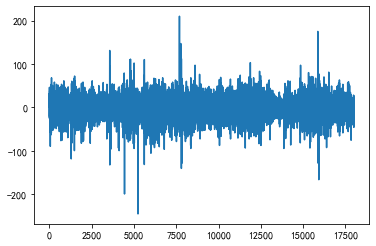

In [7]:
window = 20
m = 3

dftest = pd.read_csv('2017-12_bme280sof_6040_format.csv')
# dftest = pd.read_csv('2019-07_bme280sof_12347_format.csv')
# dftest = pd.read_csv('2019-07_bme280sof_7724_format.csv')


# dftest = dftest.drop(columns='Unnamed: 0')
# dftest = dftest[(abs(dftest['temperature']) < 10000)]
dftest = dftest[((abs(dftest['temperature']) < 5000))]
dftest['diff'] = dftest['temperature'].diff().fillna(0)
plt.plot(range(len(dftest['diff'])), dftest['diff'])
print(len(dftest))
print(dftest['diff'].mean(), dftest['diff'].std())

arrNew = dftest['diff'].values
idxNew = dftest.index
cnt = 0
idx_ab_new, val_ab_new = [], []
valNew = [arrNew[t] for t in range(m * window)]
for i in range(m*window, len(arrNew), window):
    curr = arrNew[i:i+window]
    curr_mu = curr.mean()
    curr_sigma = curr.std(ddof=0)

    mean = np.array(valNew[-m*window:]).mean()
    var = np.array(valNew[-m*window:]).std(ddof=0)

    t = (curr_mu - mean) / np.sqrt(curr_sigma**2/window + var**2/(m*window))
    print(curr_mu, mean, curr_sigma, var, t)
    # if abs(curr_mu - mean) < var and curr_sigma < 2*var:
    if abs(t) <= 2.871 and curr_sigma < 10 * var:
        valNew.extend(curr)
    else:
        cnt += 1
        idx_ab_new.extend(idxNew[i:i+window])
        val_ab_new.extend(arrNew[i:i+window])

len(idx_ab_new), len(valNew), cnt

17556 17556
-48.25 8.75 202.46700348451841 16.583752088515233


(20,
 17536,
 array([14389, 14390, 14391, 14392, 14393, 14394, 14395, 14396, 14397,
        14398, 14399, 14400, 14401, 14402, 14403, 14404, 14405, 14406,
        14407, 14408]),
 array([-928.,   -7.,   -2.,    4.,   -8.,    4.,   -4.,   -5.,   12.,
          -4.,   12.,    5.,  -32.,   -6.,   16.,   -5.,   -3.,   -1.,
         -47.,   34.]),
 1)

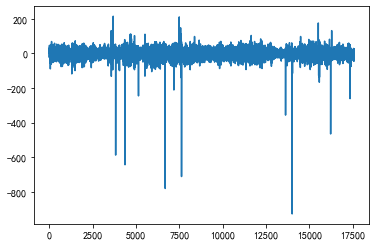

In [8]:
# 去除上述异常值后，测试当前表中是否仍有异常值

df_norm = dftest.drop(index=list(idx_ab_new))
# df_norm = df
df_norm['diff'] = df_norm['temperature'].diff().fillna(0)
# df_norm['diff'] = df_norm['humidity'].diff().fillna(0)
# df_norm['diff'] = df_norm['pressure'].diff().fillna(0)
plt.plot(range(len(df_norm)), df_norm['diff'])
arrNorm = df_norm['diff'].values
idxNorm = df_norm.index
print(len(arrNorm), len(idxNorm))
cnt = 0
idx_ab_norm = []
val_ab_norm = []
valNorm = [arrNorm[t] for t in range(m*window)]
for i in range(m*window, len(arrNorm), window):
    curr = arrNorm[i:i+window]
    curr_mu = curr.mean()
    curr_sigma = curr.std(ddof=0)

    mean = np.array(valNorm[-m*window:]).mean()
    var = np.array(valNorm[-m*window:]).std(ddof=0)

    t = (curr_mu - mean) / np.sqrt(curr_sigma**2/window + var**2/(m*window))

    if abs(t) <= 2.871 and curr_sigma < 10 * var:
        valNorm.extend(curr)
    else:
        cnt += 1
        idx_ab_norm.extend(idxNorm[i:i+window])
        val_ab_norm.extend(arrNorm[i:i+window])
        print(curr_mu, mean, curr_sigma, var)


len(idx_ab_norm), len(valNorm), np.array(idx_ab_norm), np.array(val_ab_norm), cnt

In [12]:
# 随机插入新的异常值
df_insert = df_norm.T
# col_n = np.array(range(m * window+3 * window, len(df_norm), np.random.randint(900, 1100))).astype('int64')
# col_n = np.array(range(m * window+window, len(df_norm), np.random.randint(190, 210))).astype('int64')
col_n = np.array(range(m * window+3 * window, len(df_norm), np.random.randint(90, 110))).astype('int64')
# col_n = np.array(range(m * window+3 * window, len(df_norm), np.random.randint(40, 60))).astype('int64')
print(df_insert.values.shape[1])
for obj in col_n.flatten():
    df_insert.insert(int(obj), obj+1e9, None)
total = df_insert.values.shape[1]
total, len(col_n), len(col_n)/total

17556


(17733, 177, 0.009981390627643376)

In [13]:
# 给插入的列赋值为固定异常值-10000
df_inserted = df_insert.T
idx_na = df_inserted.index[df_inserted['temperature'].isna()==True]
df_inserted = df_inserted.fillna(method='ffill')
print(df_inserted.loc[idx_na, 'diff'])
df_inserted.loc[idx_na, 'diff'] = -10000
# df_inserted.loc[idx_na, 'temperature'] = df_inserted.loc[idx_na, 'temperature'] + 
print(df_inserted.loc[idx_na, 'diff'])

1000000120   -23.0
1000000219   -28.0
1000000318    17.0
1000000417   -32.0
1000000516    39.0
              ... 
1000017148    -2.0
1000017247     1.0
1000017346    10.0
1000017445     2.0
1000017544     2.0
Name: diff, Length: 177, dtype: float64
1000000120   -10000.0
1000000219   -10000.0
1000000318   -10000.0
1000000417   -10000.0
1000000516   -10000.0
               ...   
1000017148   -10000.0
1000017247   -10000.0
1000017346   -10000.0
1000017445   -10000.0
1000017544   -10000.0
Name: diff, Length: 177, dtype: float64


17733 17733
-500.4 -0.55 2179.5482651228444 26.974942075934095 -1.0255978852189924
-503.3 -1.9833333333333334 2178.8372610179035 24.780026679207232 -1.0289469526071846
-498.8 1.9 2179.7847508412387 21.46524322402769 -1.027240090067533
-500.1 -0.45 2179.5246477156434 15.084677656483086 -1.0252166192098853
-497.6 -0.95 2180.1205104305586 19.130625534292736 -1.0187775435337312
-500.7 -2.8666666666666667 2179.3783310843487 22.17390859145546 -1.021548166664287
-503.4 -0.95 2178.7337928255483 21.669813873989167 -1.031327311041531
-502.25 -2.966666666666667 2179.0088314414884 26.140623983031134 -1.0246903814219086
-502.3 2.566666666666667 2179.0035360228308 24.273007413357103 -1.0361551238703863
-498.8 -0.08333333333333333 2179.7513069155393 18.549296183114034 -1.0231909533846664
-501.9 -0.8 2179.153227746961 22.61842906422401 -1.028356822961351
-499.5 -0.3333333333333333 2179.5898811473685 12.60379131672512 -1.0241966967057146
-508.55 -0.36666666666666664 2177.7114931735105 14.06172899120951

(3736,
 13993,
 array([  120,   121,   122, ..., 18082, 18083, 18084]),
 array([-20.,   5., -21., ...,  22., -46.,  25.]),
 187)

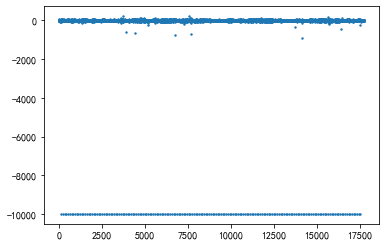

In [14]:
# 检测新插入的异常值

df_find = df_inserted.reset_index()
# df_find['diff'] = df_find['temperature'].diff().fillna(0)
plt.scatter(range(len(df_find)), df_find['diff'], s=2)
arrFind = df_find['diff'].values
idxFind = df_find.index
print(len(arrFind), len(idxFind))
cnt = 0
idx_ab_find = []
val_ab_find = []
valFind = [arrFind[t] for t in range(m*window)]
for i in range(m*window, len(arrFind), window):
    curr = arrFind[i:i+window]
    curr_mu = curr.mean()
    curr_sigma = curr.std(ddof=0)

    mean = np.array(valFind[-m*window:]).mean()
    var = np.array(valFind[-m*window:]).std(ddof=0)

    t = (curr_mu - mean) / np.sqrt(curr_sigma**2/window + var**2/(m*window))

    if abs(t) <= 2.871 and curr_sigma < 10 * var:
        valFind.extend(curr)
    else:
        cnt += 1
        idx_ab_find.extend(idxNorm[i:i+window])
        val_ab_find.extend(arrNorm[i:i+window])
        print(curr_mu, mean, curr_sigma, var, t)


len(idx_ab_find), len(valFind), np.array(idx_ab_find), np.array(val_ab_find), cnt

([0.9842412561646166, 0.9674617943946314, 0.9612845473872664],
 [0.9770114942528736, 0.9315789473684211, 0.905982905982906],
 [0.96045197740113, 0.9389920424403183, 0.8945147679324895])

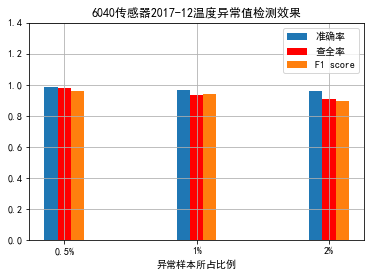

In [10]:
import matplotlib.pyplot as plt
# 2017-12传感器6040，插入温度异常值为-10000（-100℃）
# 原始数据总共17996条，在4倍标准差的判断条件下，原始数据中共有79条异常数据。
# 原始数据的一阶差分的均值和方差分别为 0.0102, 7.48
# xarray = ['1%', '587/11166', 1173/11752]
xarray = ['0.1%', '0.5%', '1%', '2%'][1:]
P2 = [18/19, 85/90, 177/187, 318/360][1:]
R2 = [18/19, 85/87, 177/190, 318/351][1:]
acc2 = [(360+17234)/17574, (1700+15840-87-90)/17641, (3540+13993-187-190)/17733, (6360+11494-321-351)/17874][1:]
F2 = [2*p*r/(p+r) for (p, r) in zip(P2,R2)]           # [0.7547169811320755, 0.9417620706819313, 0.9715397713451716]

# fig = plt.figure(figsize=(15,10))
# plt.ylim(0, 1.5)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# plt.bar([1.1,2.1,3.1,4.1], P2, 0.1, label='精确率', align='center')
plt.bar([0.9,1.9,2.9,3.9][1:], acc2, 0.1, label='准确率', align='center')
plt.bar([1,2,3,4][1:], R2, 0.1, color='r', label='查全率', tick_label=xarray)
plt.bar([1.1,2.1,3.1,4.1][1:], F2, 0.1, label='F1 score')
plt.xlabel('异常样本所占比例')
# plt.ylabel()
plt.title('6040传感器2017-12温度异常值检测效果')
plt.ylim(0,1.4)
plt.legend()
plt.grid(True)
acc2, R2, F2

In [16]:
P2 = [18/19, 85/90, 177/187, 318/321][1:]
R2 = [18/18, 85/85, 177/177, 318/318][1:]
acc2 = [(360+17234)/17574, (1700+15840)/17641, (3540+13993)/17733, (6360+11494)/17874][1:]
F2 = [2*p*r/(p+r) for (p, r) in zip(P2,R2)] 
P2,R2,acc2,F2

([0.9444444444444444, 0.946524064171123, 0.9906542056074766],
 [1.0, 1.0, 1.0],
 [0.9942747009806701, 0.9887215925111374, 0.9988810562828689],
 [0.9714285714285714, 0.9725274725274725, 0.9953051643192489])

([0.9660812265364522, 0.9450845155053949, 0.9291862083183013],
 [0.9635416666666666, 0.902676399026764, 0.9118541033434651],
 [0.925, 0.8548387096774194, 0.8174386920980926])

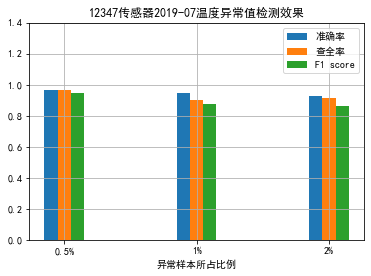

In [24]:
# 2019-07传感器12347，插入温度异常值为-10000（-100℃）
# 原始数据总共17996条，在4倍标准差的判断条件下，原始数据中共有79条异常数据。
# 原始数据的一阶差分的均值和方差分别为 0.0102, 7.48
# xarray = ['1%', '587/11166', 1173/11752]
xarray = ['0.1%', '0.5%', '1%', '2%'][1:]
P1 = [38/40, 185/200, 371/434, 900/1101][1:]
R1 = [38/41, 185/192, 371/411, 900/987][1:]
acc1 = [(760+36864-229-192)/37944, (3700+33520-229-192)/38091, (7420+29600-434-411)/38277, (18000+19986-941-987)/38806][1:]
F1 = [2*p*r/(p+r) for (p, r) in zip(P1,R1)]           # [0.7547169811320755, 0.9417620706819313, 0.9715397713451716]

# fig = plt.figure(figsize=(15,10))
# plt.ylim(0, 1.5)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# plt.bar([1.1,2.1,3.1,4.1][1:], P1, 0.1, label='精确率', align='center')
plt.bar([0.9,1.9,2.9,3.9][1:], acc1, 0.1, label='准确率', align='center')
plt.bar([1,2,3,4][1:], R1, 0.1, label='查全率', tick_label=xarray)
plt.bar([1.1,2.1,3.1,4.1][1:], F1, 0.1, label='F1 score')
plt.xlabel('异常样本所占比例')
# plt.ylabel()
plt.title('12347传感器2019-07温度异常值检测效果')
plt.ylim(0,1.4)
plt.legend()
plt.grid(True)
acc1, R1, P1

In [17]:
P1 = [38/54, 185/229, 371/434, 900/941][1:]
R1 = [38/38, 185/185, 371/371, 900/900][1:]
acc1 = [(760+36864)/37944, (3700+33520)/38091, (7420+29600)/38277, (18000+19986)/38806][1:]
F1 = [2*p*r/(p+r) for (p, r) in zip(P1,R1)]   
R1,acc1,F1

([1.0, 1.0, 1.0],
 [0.9771337061248064, 0.9671604357708284, 0.9788692470236562],
 [0.893719806763285, 0.9217391304347826, 0.977729494839761])

(0.0, 1.1)

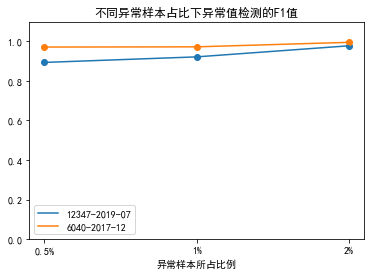

In [18]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.plot(xarray, F1, label='12347-2019-07')
plt.scatter(xarray, F1)
plt.plot(xarray, F2, label='6040-2017-12')
plt.scatter(xarray, F2)
plt.legend()
plt.title('不同异常样本占比下异常值检测的F1值')
plt.xlabel('异常样本所占比例')
plt.ylim(0, 1.1)

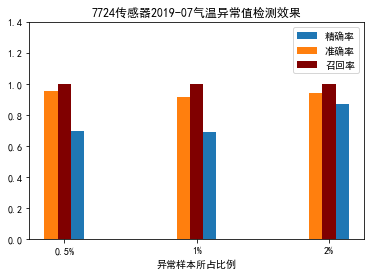

In [4]:
# 2019-07传感器7724，插入温度异常值为-10000（-100℃）
# 原始数据总共17996条，在4倍标准差的判断条件下，原始数据中共有79条异常数据。
# 原始数据的一阶差分的均值和方差分别为 0.0102, 7.48
# xarray = ['1%', '587/11166', 1173/11752]
xarray = ['0.1%', '0.5%', '1%', '2%'][1:]
P2 = [8/36, 44/63, 78/113, 158/182][1:]
R2 = [9/9, 44/44, 78/78, 158/158][1:]
acc2 = [(180+7587)/8308, (880+7083)/8343, (1560+6117)/8377, (3160+4817)/8457][1:]
F2 = [2*p*r/(p+r) for (p, r) in zip(P2,R2)]           # [0.7547169811320755, 0.9417620706819313, 0.9715397713451716]

# fig = plt.figure(figsize=(15,10))
# plt.ylim(0, 1.5)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.bar([1.1,2.1,3.1,4.1][1:], P2, 0.1, label='精确率', align='center')
plt.bar([0.9,1.9,2.9,3.9][1:], acc2, 0.1, label='准确率', align='center')
plt.bar([1,2,3,4][1:], R2, 0.1, color='maroon', label='召回率', tick_label=xarray)
plt.xlabel('异常样本所占比例')
# plt.ylabel()
plt.title('7724传感器2019-07气温异常值检测效果')
plt.ylim(0,1.4)
plt.legend()

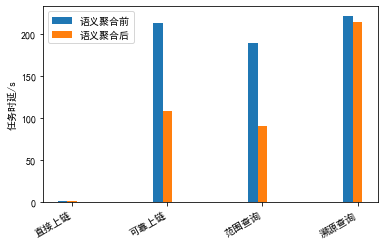

In [25]:
xarray = ['直接上链', '可靠上链', '范围查询', '溯源查询']
t1 = [1.8,213,190,222] 
t2 = [1.7,108,91,214]
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.bar([0.9, 1.9, 2.9, 3.9], t1, 0.1, label='语义聚合前')
plt.bar([1, 2, 3, 4], t2, 0.1, label='语义聚合后', tick_label=xarray)
plt.ylabel('任务时延/s')
plt.legend()
plt.gcf().autofmt_xdate()




([<matplotlib.axis.XTick at 0x24026cdae20>,
 [Text(1, 0, '100000'),
  Text(2, 0, '200000'),
  Text(3, 0, '300000'),
  Text(4, 0, '400000')])

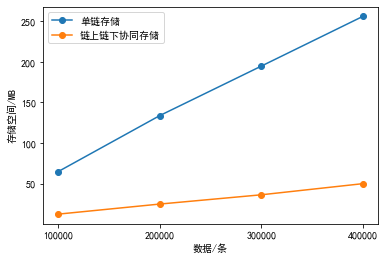

In [33]:
xarray = ['十万条数据', '二十万条数据', '三十万条数据', '四十万条数据']
t1 = [64.9,133.8,194.7,255.9] 
t2 = [12.4,24.8,36.2,49.9]
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# plt.bar([0.9, 1.9, 2.9, 3.9], t1, 0.1, label='语义聚合前')
# plt.bar([1, 2, 3, 4], t2, 0.1, label='语义聚合后', tick_label=xarray)
plt.plot([1, 2, 3, 4], t1, marker='o', label='单链存储')
plt.plot([1, 2, 3, 4], t2, marker='o', label='链上链下协同存储')
# plt.scatter([1, 2, 3, 4], t1)
# plt.scatter([1, 2, 3, 4], t2)
plt.ylabel('存储空间/MB')
plt.xlabel('数据/条')
plt.legend()
plt.xticks([1,2,3,4], [100000, 200000, 300000, 400000])
# plt.gcf().autofmt_xdate()




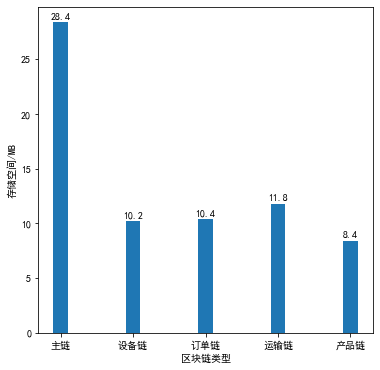

In [63]:
xarray = ['主链', '设备链', '订单链', '运输链', '产品链']
t1 = [28.4, 10.2, 10.4, 11.8, 8.4] 
# t2 = [12.4,24.8,36.2,49.9]
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
ig, ax = plt.subplots(figsize=(6,6))
# plt.bar([0.9, 1.9, 2.9, 3.9], t1, 0.1, label='语义聚合前')
plt.bar([1, 2, 3, 4, 5], t1, 0.2, tick_label=xarray)
# plt.plot([1, 2, 3, 4], t1, marker='o', label='单链存储')
# plt.plot([1, 2, 3, 4], t2, marker='o', label='链上链下协同存储')
# plt.scatter([1, 2, 3, 4], t1)
# plt.scatter([1, 2, 3, 4], t2)
plt.ylabel('存储空间/MB')
plt.xlabel('区块链类型')
# plt.legend()
for x,y in zip([1,2,3,4,5], t1):
    plt.text(x,y+0.2,'%.1f' %y, ha='center',va='bottom')
# plt.grid(True, axis='y')
# plt.xticks([1,2,3,4], [100000, 200000, 300000, 400000])
# plt.gcf().autofmt_xdate()
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)



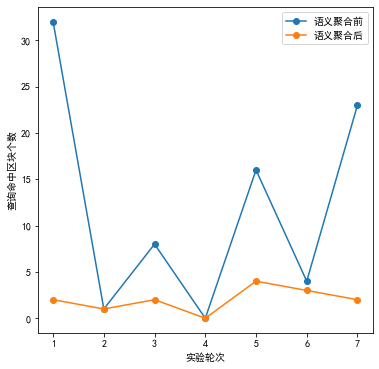

In [65]:
xarray = ['主链', '设备链', '订单链', '运输链', '产品链']
t1 = [32, 1, 8, 0, 16, 4, 23] 
t2 = [2, 1, 2, 0, 4, 3, 2]
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
ig, ax = plt.subplots(figsize=(6,6))
# plt.bar([0.9, 1.9, 2.9, 3.9], t1, 0.1, label='语义聚合前')
plt.plot([1, 2, 3, 4, 5, 6, 7], t1, marker='o', label='语义聚合前')
plt.plot([1, 2, 3, 4, 5, 6, 7], t2, marker='o', label='语义聚合后')
# plt.plot([1, 2, 3, 4], t1, marker='o', label='单链存储')
# plt.plot([1, 2, 3, 4], t2, marker='o', label='链上链下协同存储')
# plt.scatter([1, 2, 3, 4], t1)
# plt.scatter([1, 2, 3, 4], t2)
plt.ylabel('查询命中区块个数')
plt.xlabel('实验轮次')
plt.legend()
# for x,y in zip([1,2,3,4,5], t1):
    # plt.text(x,y+0.2,'%.2f' %y, ha='center',va='bottom')
# plt.grid(True, axis='y')
# plt.xticks([1,2,3,4], [100000, 200000, 300000, 400000])
# plt.gcf().autofmt_xdate()
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

